## Import functions

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)  #Adjusts the plots that we will create

### Read csv file into notebook

In [113]:
df = pd.read_csv('E:\Python projects\movies.csv')

In [114]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


### Looking for missing data

In [115]:
for col in df.columns:
    
    pct_missing = np.mean(df[col].isnull())
    
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### Data cleaning

In [116]:
#To change the datatype of budget and gross column

#instead of df['budget'].astype('int64') use the below one
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [118]:
#To check if the release date and year columns are same year- To create a new column with only year from released column
df['month'] = df['released'].astype(str).str[:3]
#df.drop(['year_correct'], axis=1)


In [131]:
#sort values based on gross revenue
df = df.sort_values(by=['gross'],inplace=False, ascending=False)


In [63]:
#To get all the data
pd.set_option('display.min_rows', None)

In [132]:
#To reset the option back to limited rows
pd.reset_option('display.max_rows')


In [133]:
#Drop duplicates
df['company'].drop_duplicates().sort_values(ascending =False) #Gives all the company's which have duplicates. To apply, equate it to df['company']

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

# Data analysis

In [141]:
#We will be finding the correlation between budget and gross collection using Pearson method




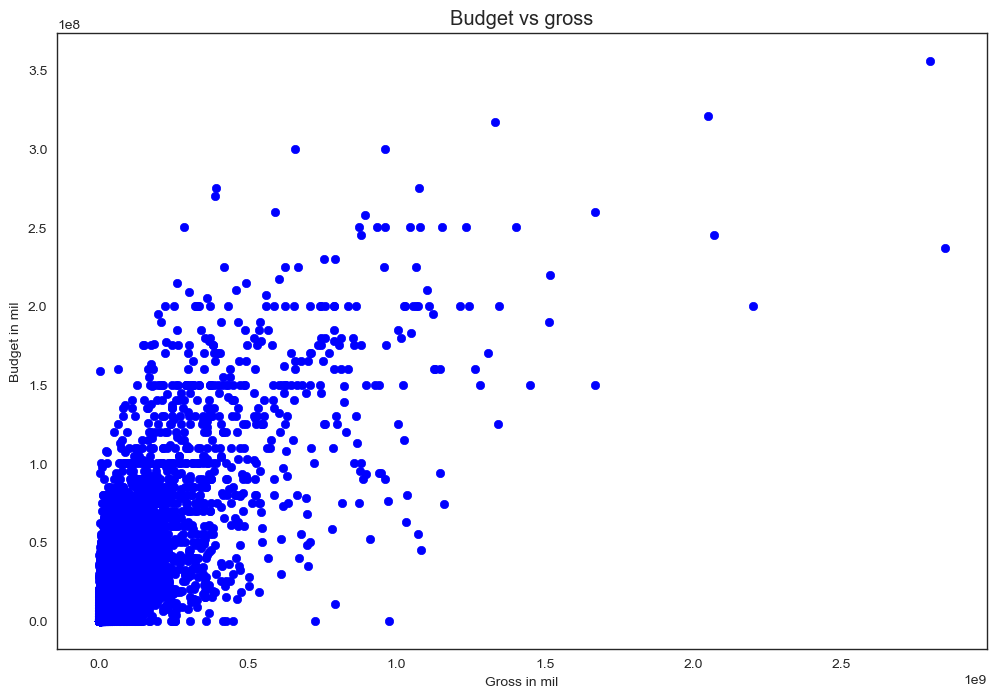

In [135]:
#Budget correlation- use scatter plot

plt.scatter(x='gross', y='budget', data=df, c='b')

plt.title('Budget vs gross')
plt.xlabel('Gross in mil')
plt.ylabel('Budget in mil')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

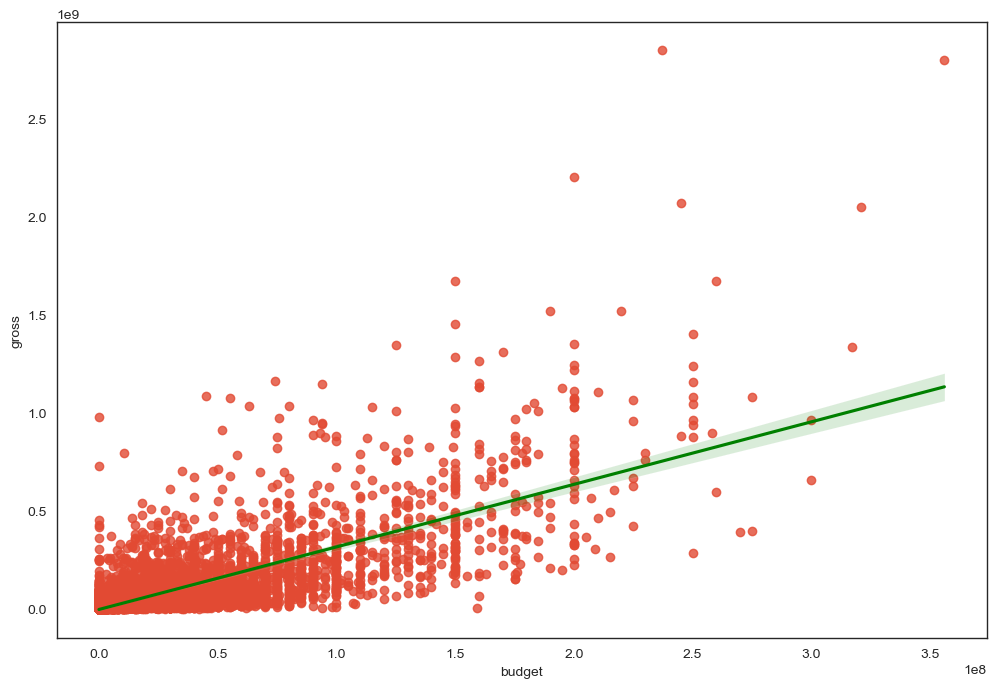

In [136]:
#To plot a regression plot
sns.set_style('white')
sns.regplot(x='budget', y='gross', data=df, line_kws={'color':'g'})

C:\Users\User\AppData\Local\Temp\ipykernel_17940\3613495776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson') #Correlation method can be pearson, kendall, spearman


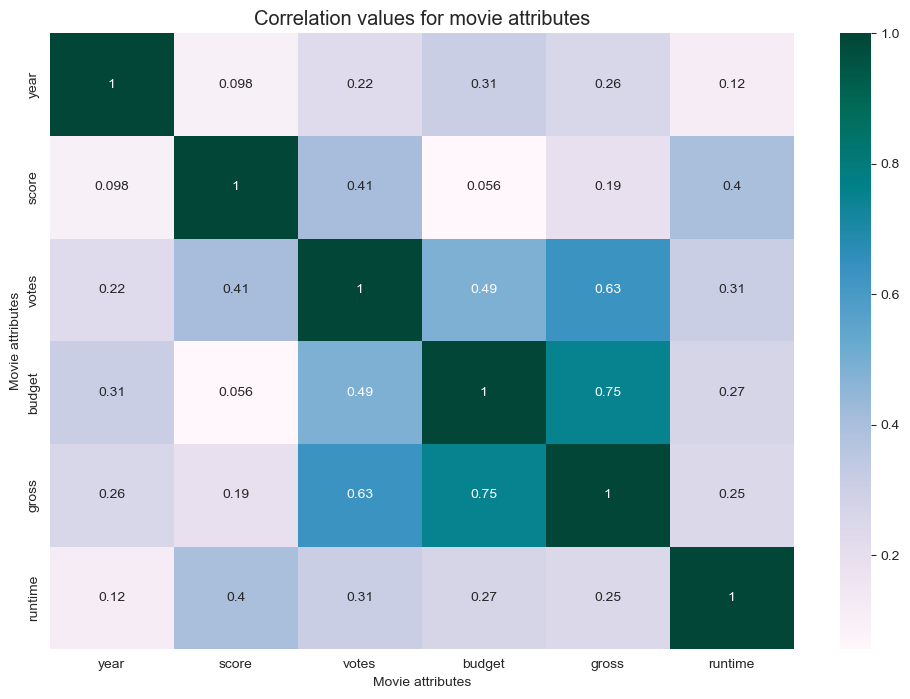

In [137]:
#Correlation values/matrix
corr_matrix = df.corr(method='pearson') #Correlation method can be pearson, kendall, spearman
sns.heatmap(data= corr_matrix, annot=True, cmap='PuBuGn')
plt.title('Correlation values for movie attributes')
plt.xlabel('Movie attributes')
plt.ylabel('Movie attributes')
plt.show()

#According to the heatmap, the correlation between budget and gross attributes is more than 0.7.





In [138]:
#Give numerized values to columns which are not numeric
df_numerized = df
for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized

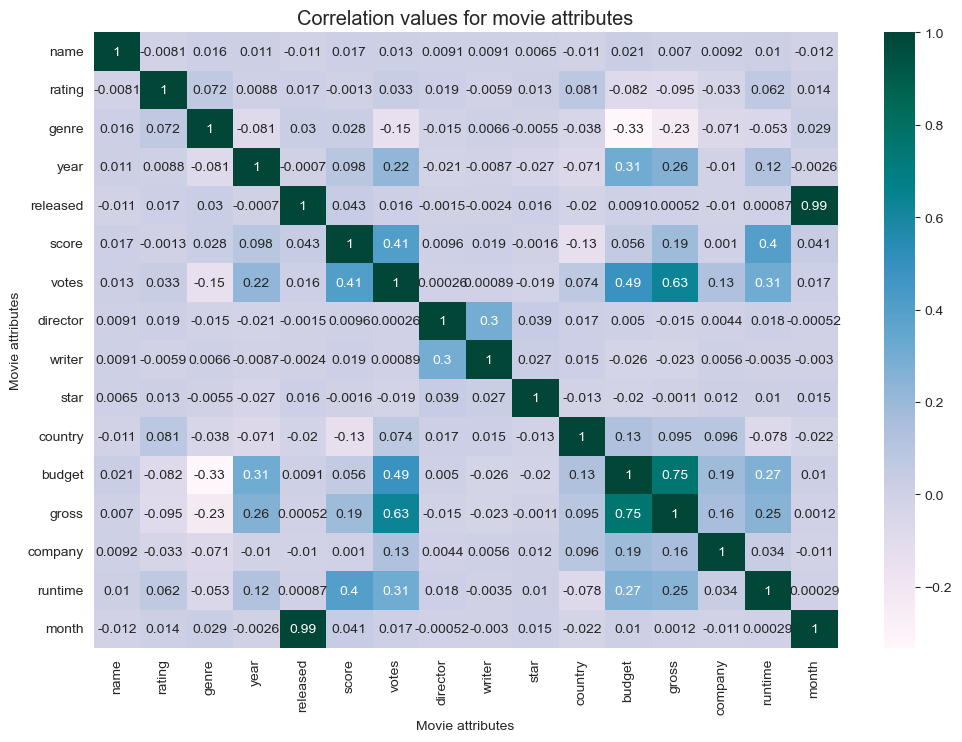

In [127]:
corr_matrix = df_numerized.corr(method='pearson') #Correlation method can be pearson, kendall, spearman
sns.heatmap(data= corr_matrix, annot=True, cmap='PuBuGn')
plt.title('Correlation values for movie attributes')
plt.xlabel('Movie attributes')
plt.ylabel('Movie attributes')
plt.show()


In [139]:
corr_mat1 = df_numerized.corr()
corr_pair = corr_mat1.unstack()
corr_pair

In [140]:
sorted_pair = corr_pair.sort_values()
sorted_pair

In [130]:
high_corr = sorted_pair[(sorted_pair)>0.5]
high_corr

votes     gross       0.632834
gross     votes       0.632834
          budget      0.750157
budget    gross       0.750157
released  month       0.994581
month     released    0.994581
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
month     month       1.000000
dtype: float64

In [ ]:
#Budget and gross have the highest correlation as assumed earlier

    